## <strong> 0. Abstract </strong>

지금까지 deep network의 성공적인 학습을 위해서는 수천개의 training sample이 필요했다. <br>
U-Net 논문에서는 training sample을 더 효율적으로 사용하기 위한 **data augmentation**을 기반으로 **새로운 network**와 **training strategy**를 제시한다고 한다. <br>

architecture는 다음과 같이 구성된다.
* contracting path: context를 잡아내기(capture)하기 위한 path
* expanding path: contractin path와 대칭이며 정확한 localization을 가능하게 하는 path

논문에서는 위와 같은 구조를 가진 network가 **매우 적은 이미지로 학습될 수 있으며** 이전의 최고 성능을 달성한 방식보다 성능도 우수했다고 한다.

## <strong> 1. Introduction </strong>

### <strong> History & U-Net's origin </strong>

이전까지 많은 convolution network들이 개발됐지만 이용가능한 학습 데이터의 크기와 network의 크기에 대한 한계점을 가졌다. <br>
하지만 약 백만개의 학습 이미지를 가진 ImageNet dataset에 대하여 8개의 layer와 수백개의 파라미터로 이루어진 **AlexNet의 등장**으로 돌파구가 생겼다고 한다. <br>
그리고 AlexNet의 등장 이후 더 크고 더 깊은 network가 학습되기 시작했다.






convolution network은 전형적으로 이미지의 출력물이 단일 class label인 classification task에 사용된다. <br>
하지만 생물 의학적 이미지 처리와 같은 많은 visual task에서는 **localization을 포함하는 출력물**을 원했다. <br>
또한 생물 의학적 task에서 수천개의 학습이미지는 모으기 불가능에 가까웠다. <br>
이러한 이유로 Ciresan은 각 pixel의 class label을 예측하기 위해 sliding window를 활용하여 network를 학습시키는 방식을 제시했다.

* [Criesan 논문 링크](https://proceedings.neurips.cc/paper/2012/file/459a4ddcb586f24efd9395aa7662bc7c-Paper.pdf)

위 방식은 다음과 같은 특징을 가진다.

* **localize가 가능하다.**
* **patch 면에서 학습 데이터가 학습 이미지보다 많다.**

해당 모델은 위와 같은 특징을 가지고 2012년 ISBI에서 열린 EM segmentation challenge에서 우승했다.

하지만 위 모델은 두 가지 결함을 가진다.

* network가 각 patch별로 작동하기 때문에 **매우 느리며** 동일한 patch들이 많아 **너무 많은 중복**을 감수해야 한다.
* **context의 사용과 localization 정확도가 trade-off 관계에 있다.** 더 많은 patch는 더 많은 max-pooling layer를 요구하며 localization의 정확도를 떨어뜨린다.

이후 최근 접근 방식([방식1](https://openaccess.thecvf.com/content_iccv_2013/papers/Seyedhosseini_Image_Segmentation_with_2013_ICCV_paper.pdf), [방식2](https://openaccess.thecvf.com/content_cvpr_2015/papers/Hariharan_Hypercolumns_for_Object_2015_CVPR_paper.pdf))들은 여러 layer로 부터 feature를 고려하는 더 classifier한 출력물을 제시했다.

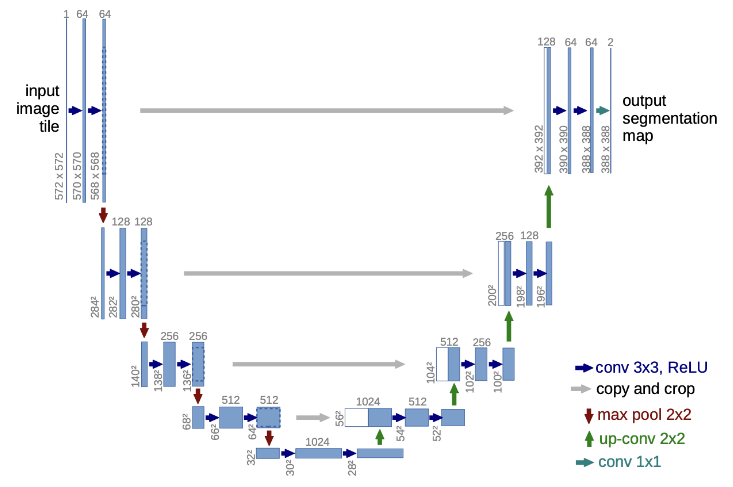

U-Net은 [**fully convolutional network**](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf)라고 불리는 더 elegant한(우아한) architecture를 기반으로 했다고 한다. <br>
연구진들은 해당 FCN 모델을 매우 적은 학습 이미지로도 작동하고 더 정확한 segmentation을 달성하도록 확장했다고 한다. <br>



FCN의 핵심 아이디어는 contracting network에 **pooling operator가 upsampling operator로 변경된 layer들을 추가**한 것이라고 한다. <br>
즉, 해당 layer들은 출력의 해상도를 증가시키는 역할을 한다. <br>
또한 localization을 위해 contracting path로부터 추출된 feature들을 upsampling 된 결과물과 결합시킨다. <br>
위 결합 방식을 사용하면 해당 convolution layer는 이러한 정보를 기반으로 더 정확한 결과물을 조합하도록 학습할 수 있다고 한다.

### <strong> Modification </strong>

FCN을 변경한 U-Net의 중요한 변경점중 하나는 higher resolution layer에 context information를 전파하기 위해 **upsampling 부분에서 많은 channel들을 가진다는 점이다.** <br>
따라서 **expanding path는 contracting path와 거의 대칭**되게 되었고, **u 모양의 architacture**가 생겨났다. <br>
이 network는 fully connected layer를 가지고 있지 않고, 각 convolution의 유효한 부분만을 사용한다. <br>
즉, segmentation map은 입력 이미지에서 전체 context를 사용할 수 있는 픽셀만 포함한다. <br>
위 전략은 **overlap-tile 전략**을 사용하여 임의의 큰 이미지도 아주 매끄러운 segmentation이 가능하게 해준다고 한다. <br>
이때 이미지의 border 부분의 픽셀을 예측할 때, missing context는 input image의 **mirroring**된 부분으로부터 extrapolation된다.

* extrapolation: 외삽한다 / 다른 변수와의 관계에 기초해 변수 값을 추정한다.

이 tiling 전략은 큰 이미지를 network에 적용하는데 중요한 역할을 한다. (그렇지 않으면 **GPU 메모리에 의해 해상도가 제한된다.**)

<strong> Overlap-Tile </strong>


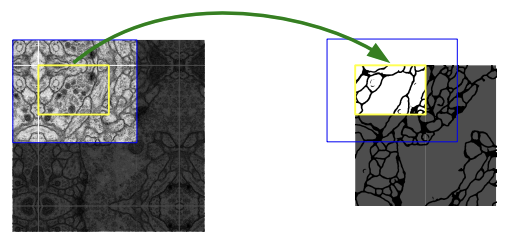

연구 당시 U-Net은 기본적으로 전자 현미경 데이터를 사용했고, 해당 데이터 특성상 이미지의 크기는 상당히 컸다. <br>
따라서 **이미지를 Patch(Tile)단위로 잘라서 input image로 사용했다**고 한다. <br>

위 그림에서 노란색 영역이 segmentation될 영역이고 파란색 부분이 Patch이다. <br>
이때 다음 **Tile을 input으로 넣을 때 이전 Patch와 겹치는 부분이 생기는데 이 때문에 Overlap-Tile이라고 불린다**고 한다. <br>

또한 위 그림에서 border 부분이 반사되어있는 것을 볼 수 있는데 이것이 위에서 말한 mirroring 부분이다.

<strong> Augmentation </strong>

U-Net의 task는 아주 적은 training data만 사용해야 했기 때문에 연구진들은 사용가능한 training data에 elastic deformation을 적용해 **과도한 augmentation을** 수행했다고 한다. <br>

<strong> Loss </strong>

또한 많은 세포를 segmentation하는 task에서 붙어있는 객체들을 분리하는 것은 어려운 문제다. 

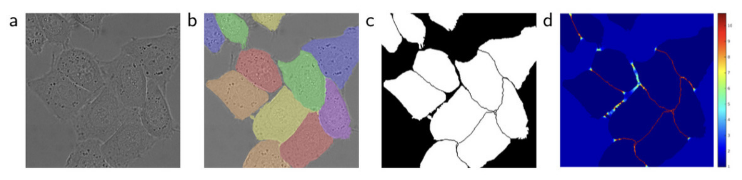

위와 같이 각 세포를 분류하기 위해 U-Net에서는 인접한 세포 사이를 background label로 분류하는 것을 큰 가중치로 두고 **weighted loss**를 적용했다고 한다. 

## <strong> 2. Network Architecture </strong>

네트워크 구조는 다음과 같다.

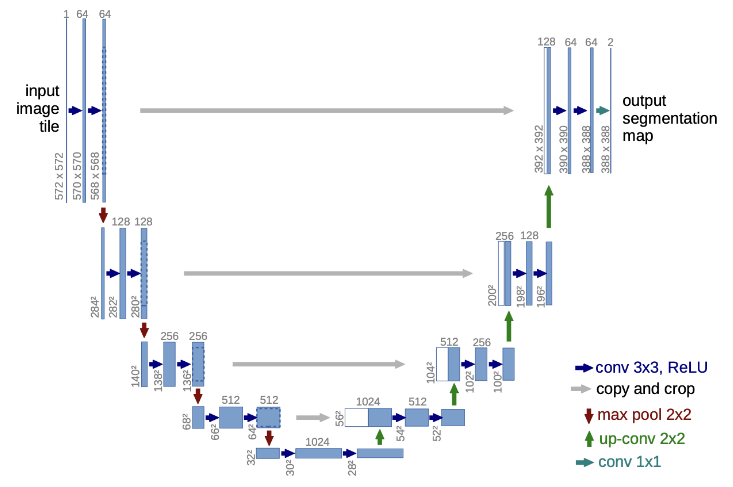

### <strong> Contracting Path </strong>

contracting path는 전형적인 convolution network의 형태를 가지며 다음과 같은 특징을 가진다.

* **3×3 convolution**을 2번 반복하며 활성화 함수로 ReLU 함수를 사용한다.
* Downsampling을 위해 2 stride로 **2×2 max pooling**을 수행한다. <br>
이때 채널 수는 2배로 늘린다.

즉, 다음과 같은 구조를 가진다.

1. 3×3 Conv Layer + ReLu + BatchNorm (Padding 0, Stride 1)
2. 3×3 Conv Layer + ReLu + BatchNorm (Padding 0, Stride 1)
3. 2×2 Max-polling Layer (Stride 2)

### <strong> Expansive Path </strong>

expansive path는 다음과 같은 특징을 가진다.
* **2×2 up-convolution**을 수행하며 채널 수는 반으로 줄인다.
* 대응하는 contracting path의 **feature map을 crop하여 결합**시킨다. <br>
cropping은 모든 convolution에서 발생하는 border pixel의 loss 때문에 필수라고 한다.
* **3×3 convolution**을 2번 반복하며 활성화 함수로 ReLU 함수를 사용한다.
* 마지막 layer에서 64-component feature vector를 요구된 class의 수로 mapping하기 위해서 **1×1 convolution**을 진행한다.

즉, 다음과 같은 구조를 가진다.
1. 2×2 DeConv layer (Stride 2)
2. Concatenation with Feture Map
3. 3×3 Conv Layer + ReLu + BatchNorm (Padding 0, Stride 1)
4. 3×3 Conv Layer + ReLu + BatchNorm (Padding 0, Stride 1)

## <strong> 3. Training </strong>

학습에서는 다음과 같은 방식을 사용했다고 한다.
* input image와 그에 상응하는 segmentation map은 SGD와 함께 사용했다.
* convolution 연산시 padding을 적용하지 않기 때문에 output image는 input image에 비해 작다. 
* overhead를 최소화하고 GPU memory 활용을 극대화하기 위해서 큰 batch size 보다 큰 input tile을 선호했다고 한다. <br>
따라서 single image의 batch size는 줄였다.
* 이전에 학습했던 sample이 현재 update에 더욱 관여하도록 높은 momentum(0.99)을 사용했다.


### <strong> Energy Function </strong>

energy function의 경우 **cross entropy와 final feature map에 대한 pixel-wise softmax를 결합**하여 계산된다. <br>

최종 feature map에 대한 픽셀 x의 예측값(softmax 값)은 다음과 같이 정의된다.

$ p_k(x)=exp(a_k(x))/(\sum_{k'=1}^K exp(a_{k'}(x)) $
* $a_k(x)$: the activation in feature channel k at the pixel position $x \in \Omega$ with $\Omega \subset Z^2$
* $K$: the number of classes


cross entropy의 경우 위에서 정의한 pixel-wise softmax를 결합하여 다음과 같이 정의한다.

$ E = \sum_{x\inΩ} w(x)log(p_{l(x)}(x)) $ 

위 cross entropy의 w(x)는 다음과 같이 정의된다.

$w(x) = w_c(x)+w_0 \cdot exp(-\frac{(d_1(x)+d_2(x))^2)}{2\sigma^2}) $

$w(x)$는 x 위치 픽셀에 가중치를 부여하는 함수다. <br>
**$w_c(x)$는 x의 위치에 해당하는 클래스의 빈도수**에 따라 값이 결정된다. <br>
즉, x 픽셀이 background일 경우가 많은지, foreground일 경우가 많은지에 따라 결정된다. <br>
그리고 exp부분에서 **d1은 가장 가까운 세포까지의 거리, d2는 두 번째로 가까운 세포까지의 거리를 의미**한다.

**즉, x가 세포사이에 존재하는 픽셀이고, 두 세포 사이의 간격이 좁을수록 큰 weight를 가진다.**

U_Net에서는 기본적으로 $w_0=10, \sigma=5$로 실험했다고 한다.

### <strong> Data Augmentation </strong>

Data Augmentation을 사용하면 적은 데이터로도 활용하여 모델을 invariance하고 robustness하게 모델을 학습시킬 수 있다. <br>
U-net에서는 **shift, rotation 기법** 등을 사용했으며 작은 학습 데이터로 segmentation network를 학습시키기 위한 핵심 전략이 **elastic deformation**이라고 주장한다. 